<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h1 style="text-align:center"> Agrupamento </h1>

<h2 style="text-align:center; margin:40px"> Qual o melhor agrupamento para os personagens abaixo?</h2>

![](img/simpsons1.png)

<h2 style="text-align:center; margin:40px"> Existem diversos agrupamentos que fazem sentido... </h2>
<h3 style="text-align:center; margin:40px"> Grupo / Cluster é um conceito subjetivo </h3>

![](img/simpsons2.png)

<p style="margin-bottom:3cm;"></p>

![](img/simpsons4.png)
<p style="margin-bottom:1cm;"></p>
<b> Objetivo: </b> Encontrar grupos tais que <b>elementos similares são posicionados no mesmo grupo e elementos dissimilares são posicionados em grupos diferentes</b>.
<p style="margin-bottom:1cm;"></p>
<ul>
<li><b> Algoritmos Particionais: </b> Constroem uma partição dos dados ![](img/particionais.png)</li>
<p style="margin-bottom:1cm;"></p>
<li><b> Algoritmos Hierárquicos: </b> Constroem uma hierarquia de partições ![](img/hierarquicos.png)</li>
</ul>

<h2 style="margin-bottom:3cm;text-align:center"> Algoritmos Hierárquicos</h2>

<p style="margin-bottom:2cm;"> Em métodos de clustering hierárquicos, no início do algoritmo, cada objeto forma um singleton (cluster com um único objeto), e a cada iteração dois clusters são unidos. Desta forma, é possível recuperar qualquer partição intermediária com o valor de K desejado. </p>

![](img/fluxo_hierarquicos.png)

<p style="margin-bottom:2cm;"> A ordem na qual os clusters são agregados gera uma estrutura de árvore conhecida como <b>dendrograma</b> </p>

![](img/dendrograma.png)

<p style="margin-bottom:2cm;"> No dendrograma acima, os singletons formados pelos objetos <b>8</b> e <b>13</b> foram os primeiros a serem agregados. Cada corte horizontal em um dendrograma gera uma partição diferente, com uma quantidade de clusters (K) também diferente, variando entre 1 e o número de objetos. </p>

<h3> <font color = 'red'>Atenção:</font> Os algoritmos de clustering hierárquico são extremamente custosos! É necessário um uso de memória proporcional a $O(n^2)$ e uma quantidade de operações que pode variar de $O(n^2)$ a $O(n^3)$!

<h3> Scipy </h3>
Agora, vamos rodar os códigos abaixo que usam implementações disponíveis no pacote <i>scipy</i>.

In [3]:
from scipy.cluster import hierarchy

In [4]:
baseDados = pd.read_csv('data/base_agrupamento_2.csv')
X = baseDados[['X','Y']]

Utilizando o algoritmo <i>single-link</i> na base de dados com clusters concêntricos, o dendrograma mostra claramente 2 clusters.

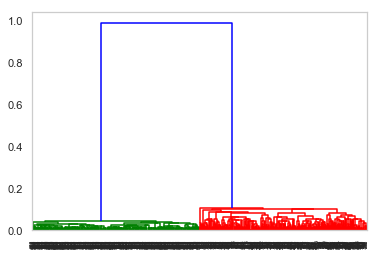

In [5]:
Z = hierarchy.linkage(X, method = 'single')
dendro = hierarchy.dendrogram(Z)
plt.show()

<b> O método de ligação pode afetar drasticamente os resultados do algoritmo </b>

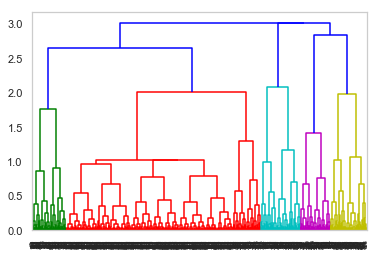

In [6]:
Z = hierarchy.linkage(X, method = 'complete')
dendro = hierarchy.dendrogram(Z)
plt.show()

Podemos recuperar uma partição com a função <i>fcluster</i>, passando como parâmetro o número de clusters desejado (K)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


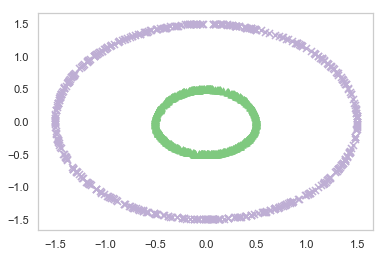

In [7]:
Z = hierarchy.linkage(X, method = 'single')
baseDados['hierarquico'] = hierarchy.fcluster(Z, 2, criterion = 'maxclust') - 1

markers = {0 : '^', 1 : 'x'}
for clu in baseDados.hierarquico.unique():
    plt.scatter(baseDados.X[baseDados.hierarquico == clu],
                baseDados.Y[baseDados.hierarquico == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu])

<h2 style="margin-bottom:1cm;text-align:center"> Prática </h2>

Agora vamos executar os algoritmos de agrupamento na base iris, interpretando e visualizando os resultados.

<b>Guidelines:</b>
<ul>
    <li>Vamos utilizar o PCA para projetar os dados em 2 dimensões</li>
    <li>Para o KMeans, vamos testar com diferentes números de clusters e diferentes métodos de inicialização</li>
    <li>Para os métodos hierárquicos, vamos testar com diferentes funções de ligação e visualizar os dendrogramas para determinar o K ideal</li>
</ul>

In [8]:
# Programe aqui